<a href="https://colab.research.google.com/github/JeanRintoul/Covid-19/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Comparisons. 

Data is taken from John Hopkins data set which is updated nightly on github. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars


Text(0, 0.5, 'confirmed cases')

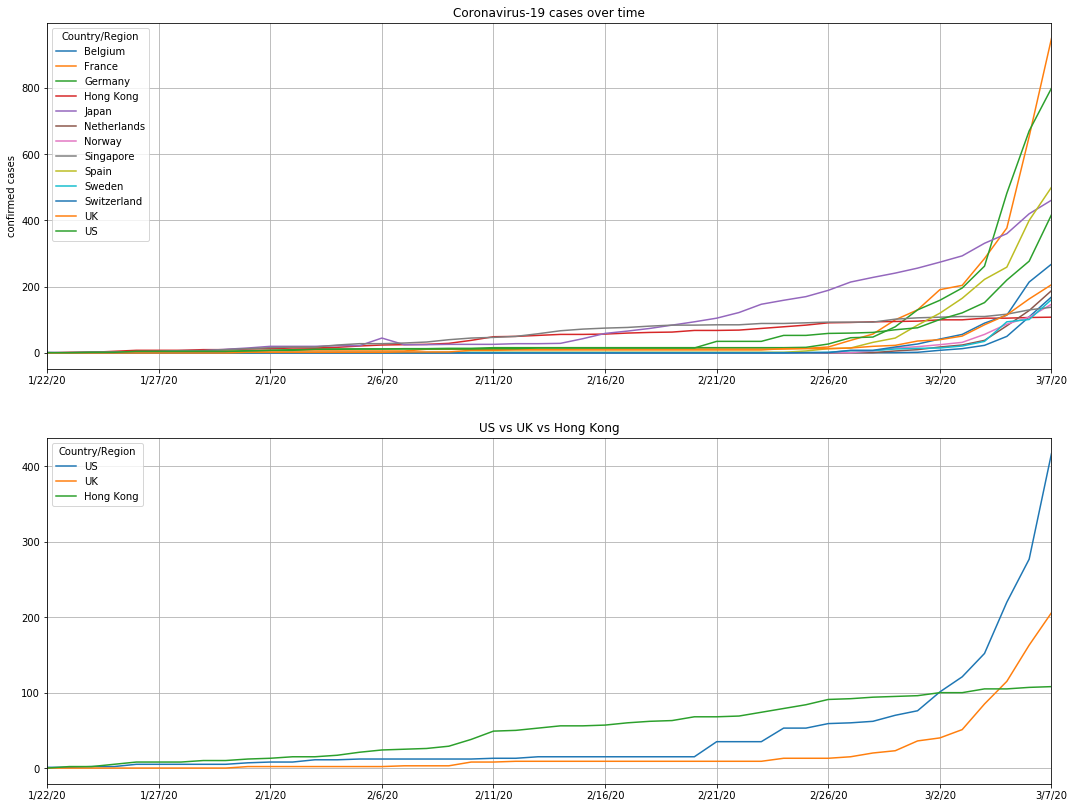

In [264]:
# import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

confirmed_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
dead_csv      = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recovered_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
confirmed = pd.read_csv(confirmed_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
dead      = pd.read_csv(dead_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
recovered = pd.read_csv(recovered_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
# toggle these thresholds to select countries to display in the time series. 
min_threshold_confirmed_cases = 100
max_threshold_confirmed_cases = 1000 # let's remove china for now. 
min2_threshold_confirmed_cases = 100
max2_threshold_confirmed_cases = 100000 # let's remove china for now. 
columns = list(confirmed)
selected  = []
deaths    = []
mortality_rate = []
all_mortality_rate = []
counts = []
for i in columns: 
    if min_threshold_confirmed_cases < confirmed[i][-1] < max_threshold_confirmed_cases and i != 'Others': 
      selected.append(i)
      deaths.append(dead[i][-1])
      mortality_rate.append(100*(dead[i][-1])/confirmed[i][-1])

    if min2_threshold_confirmed_cases < confirmed[i][-1] < max2_threshold_confirmed_cases and i != 'Others':       
      counts.append(i)
      all_mortality_rate.append(100*(dead[i][-1])/(recovered[i][-1] + (dead[i][-1])  ))

subset = confirmed.loc[:,selected]
USvsUK = confirmed.loc[:,['US','UK','Hong Kong']]

fig, (ax1, ax2) = plt.subplots(2)
subset.plot(ax=ax1, grid='on')
ax1.set_title('Coronavirus-19 cases over time')
ax1.set_ylabel('confirmed cases')
# second plot is US and UK curves
USvsUK.plot(ax=ax2, grid='on')
ax2.set_title('US vs UK vs Hong Kong')
ax1.set_ylabel('confirmed cases')

The countries closest to China appear to have the most linear trends. Those in other parts of the world are rising exponentially. Why?

# Identifying the mortality rate


How should we estimate the mortality rate? The below graph is misleading for a lot of reasons... though also makes the mortality rate of closed cases seem frighteningly high. 
The WHO estimation on 3rd March is 3% mortality rate. However, that includes lots of cases that don't yet have a resolution. It's hard to know how many cases went untested that were asymptomatic as well. 

For countries whose mortality rate is much higher than the WHO estimation, we have an indication that there is something wrong with their levels of testing, or treatment. Demographic age skew in any particular country may skew this too. 

How should mortality rate really be measured. For instance, I don't think active cases should be part of the calculation, just closed cases... in which case the mortality rate appears to go up far above 3.4%... 


[Text(0, 0, 'Belgium'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Mainland China'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'US')]

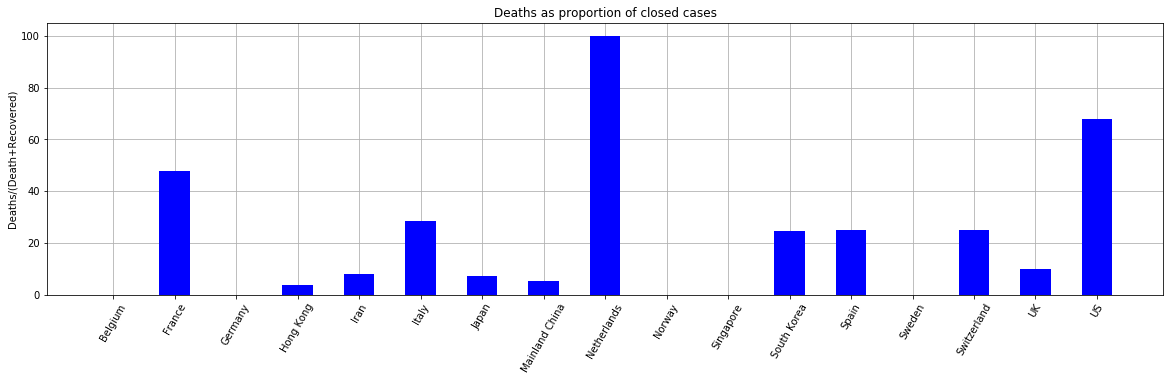

In [290]:
fig, (ax1) = plt.subplots(1,figsize=(20, 5))
ax1.grid(zorder=0)
ax1.bar(counts,all_mortality_rate, width=0.5, color='b', align='center',zorder = 3)
#threshold = 3.4 # this is the WHO mortality estimation on March 3. 
#ax1.plot([0., 18.0], [threshold, threshold], "k--")
ax1.set_ylabel('Deaths/(Death+Recovered)')
ax1.set_title('Deaths as proportion of closed cases')
ax1.set_xticklabels(counts,rotation=60)

# China vs the rest of the world.


China cases vs the rest of the world. 
Confirmed cases in two bins, one China, one rest of world. 



Text(0.5, 0, 'Date')

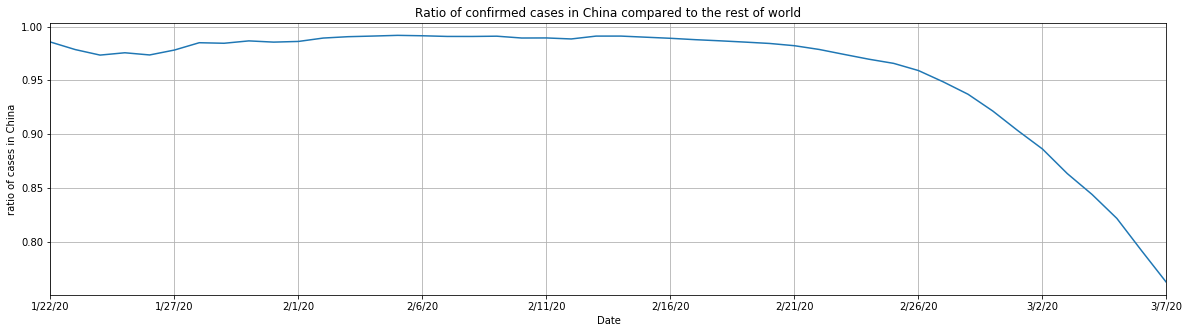

In [292]:
df = confirmed.copy()
df['everywhere_else'] = df.drop(['Mainland China'],axis=1).sum(axis=1)
df['china']           = confirmed['Mainland China']
df['ratios']          = df['china']/(df['everywhere_else']+df['china'])
# print (df['ratios'])
fig, (ax1) = plt.subplots(1,figsize=(20, 5))
df['ratios'].plot(ax=ax1, grid='on')
ax1.set_title('Ratio of confirmed cases in China compared to the rest of world')
ax1.set_ylabel('ratio of cases in China')
ax1.set_xlabel('Date')
